In [1]:
import os
if os.getcwd().endswith('lab06_adaboost'):
    os.chdir('..')

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pandas as pd

# Данные

In [4]:
data_sets = {}
for filename in ['chips', 'geyser']:
    next_data = pd.read_csv(f'lab03_svm/resources/{filename}.csv')
    next_data = next_data.replace({'P': 1, 'N': 0})
    data_sets[filename] = next_data

In [5]:
data_sets['chips']

,x,y,class
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
...,...,...,...
113,-0.720620,0.538740,0
114,-0.593890,0.494880,0
115,-0.484450,0.999270,0
116,-0.006336,0.999270,0


In [6]:
data_sets['geyser']

,x,y,class
0,1,4.4,0
1,1,3.9,0
2,1,4.0,1
3,1,4.0,0
4,1,3.5,0
...,...,...,...
217,23,2.1,1
218,23,4.2,0
219,23,2.1,1
220,23,5.2,0


# Классификация

In [7]:
from lab06_adaboost.adaboost import AdaBoostClassifier
from lab06_adaboost.utils.data import split_data

In [8]:
def count_scores(tree_params):
    scores = {}
    for name, data_set in data_sets.items():
        classifier = AdaBoostClassifier(56, params)
        x, y = split_data(data_set)
        scores[name] = classifier.fit(x, y)
    return scores

In [9]:
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [1]
}
steps = np.array([1, 2, 3, 5, 8, 13, 21, 34, 55])
all_steps = list(range(1, 57))


def plot(name, x, y, subplot):
    subplot.plot(x, y, label=name, color='red')
    subplot.plot(steps - 1, y[steps], label=f'{name}-partial', color='blue')
    subplot.set_title(name)
    subplot.legend()
    subplot.set_xlabel('step')
    subplot.set_ylabel('accuracy')

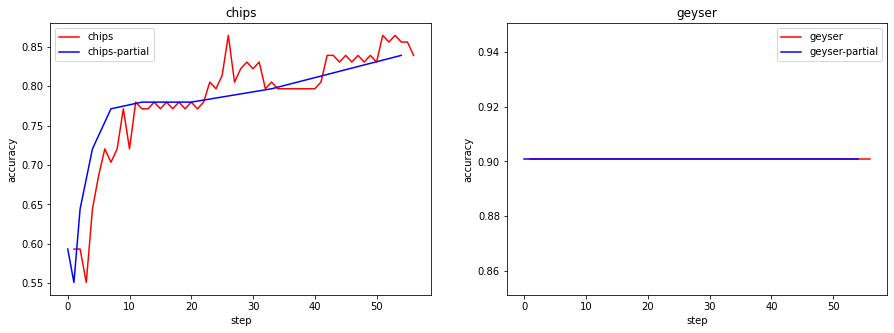

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
for i, (name, scores) in enumerate(count_scores(params).items()):
    plot(name, all_steps, scores, ax[i])

### Можно попробовать не так сильно ограничивать высоты

In [ ]:
params['max_depth'] = [1, 2, 3]
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
for i, (name, scores) in enumerate(count_scores(params).items()):
    plot(name, all_steps, scores, ax[i])

# Классификация всего пространства

In [ ]:
def meshgrid(classifier, xlim, ylim, step, limit, subplot):
    x = np.arange(xlim[0], xlim[1], step=step)
    y = np.arange(ylim[0], ylim[1], step=step)
    grid = np.meshgrid(x, y, sparse=False)
    d = pd.DataFrame()
    d['x'] = grid[0].flatten()
    d['y'] = grid[1].flatten()
    
    class_pred = classifier.predict(d.to_numpy(), limit=limit)
    subplot.pcolormesh(
        x, y, class_pred.reshape((y.shape[0], x.shape[0])),
        shading='auto'
    )
    subplot.set_title(f'after {limit} steps')
    subplot.set_xlabel('x')
    subplot.set_ylabel('y')

In [ ]:
def coord_limits(data):
    xlim = data['x'].min(), data['x'].max()
    ylim = data['y'].min(), data['y'].max()
    dx = xlim[1] - xlim[0]
    dy = ylim[1] - ylim[0]
    return (xlim[0] - dx / 10, xlim[1] + dx / 10), (ylim[0] - dy / 10, ylim[1] + dy / 10)

for name, data_set in data_sets.items():
    classifier = AdaBoostClassifier(56, params)
    x, y = split_data(data_set)
    classifier.fit(x, y)
    
    xlim, ylim = coord_limits(data_set)
    fig, ax = plt.subplots(3, (len(steps) + 2) // 3, figsize=(20, 15))
    fig.suptitle(name, fontsize=15)
    for i in range(len(steps)):
        subplot = ax[i // 3][i % 3]
        meshgrid(
            classifier, 
            xlim, ylim, min(xlim[1] - xlim[0], ylim[1] - ylim[0]) / 50, steps[i],
            subplot
        )
        subplot.scatter(x[y == 0, 0], x[y == 0, 1], color='green')
        subplot.scatter(x[y == 1, 0], x[y == 1, 1], color='red')

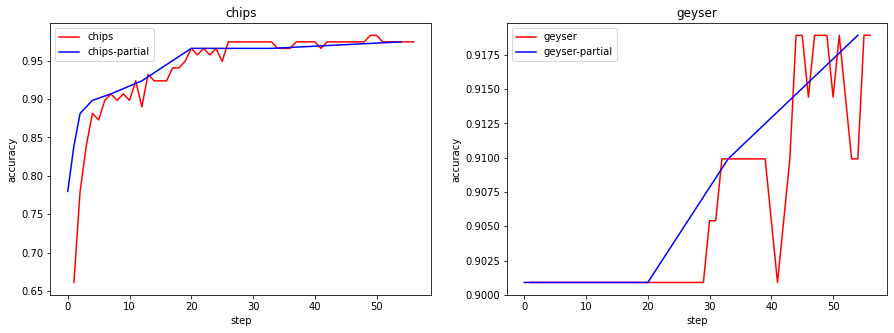

In [11]:
params['max_depth'] = [1, 2, 3]
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
for i, (name, scores) in enumerate(count_scores(params).items()):
    plot(name, all_steps, scores, ax[i])

# Классификация всего пространства

In [34]:
def meshgrid(classifier, xlim, ylim, step, limit, subplot):
    x = np.arange(xlim[0], xlim[1], step=step)
    y = np.arange(ylim[0], ylim[1], step=step)
    grid = np.meshgrid(x, y, sparse=False)
    d = pd.DataFrame()
    d['x'] = grid[0].flatten()
    d['y'] = grid[1].flatten()
    
    class_pred = classifier.predict(d.to_numpy(), limit=limit)
    subplot.pcolormesh(
        x, y, class_pred.reshape((y.shape[0], x.shape[0])),
        shading='auto'
    )
    subplot.set_title(f'after {limit} steps')
    subplot.set_xlabel('x')
    subplot.set_ylabel('y')

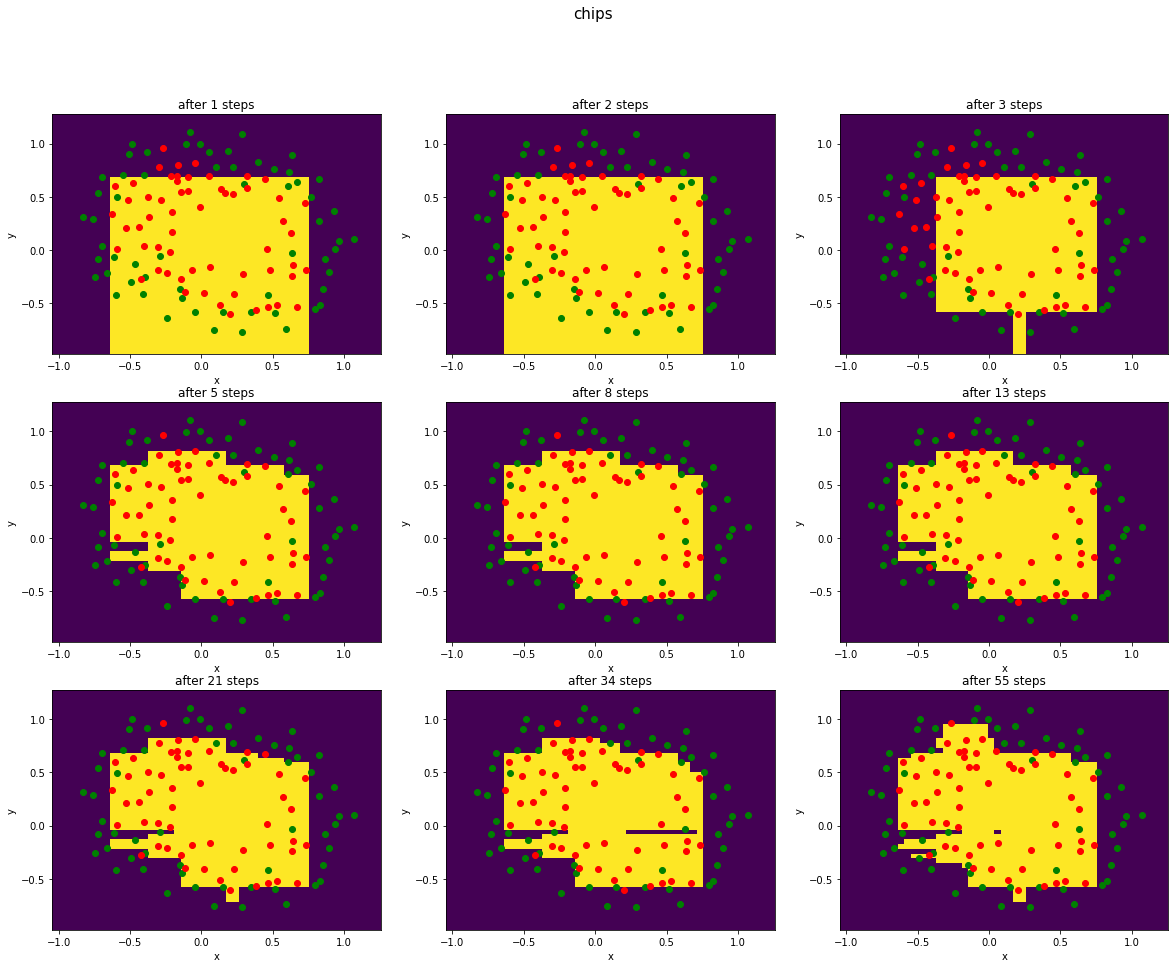

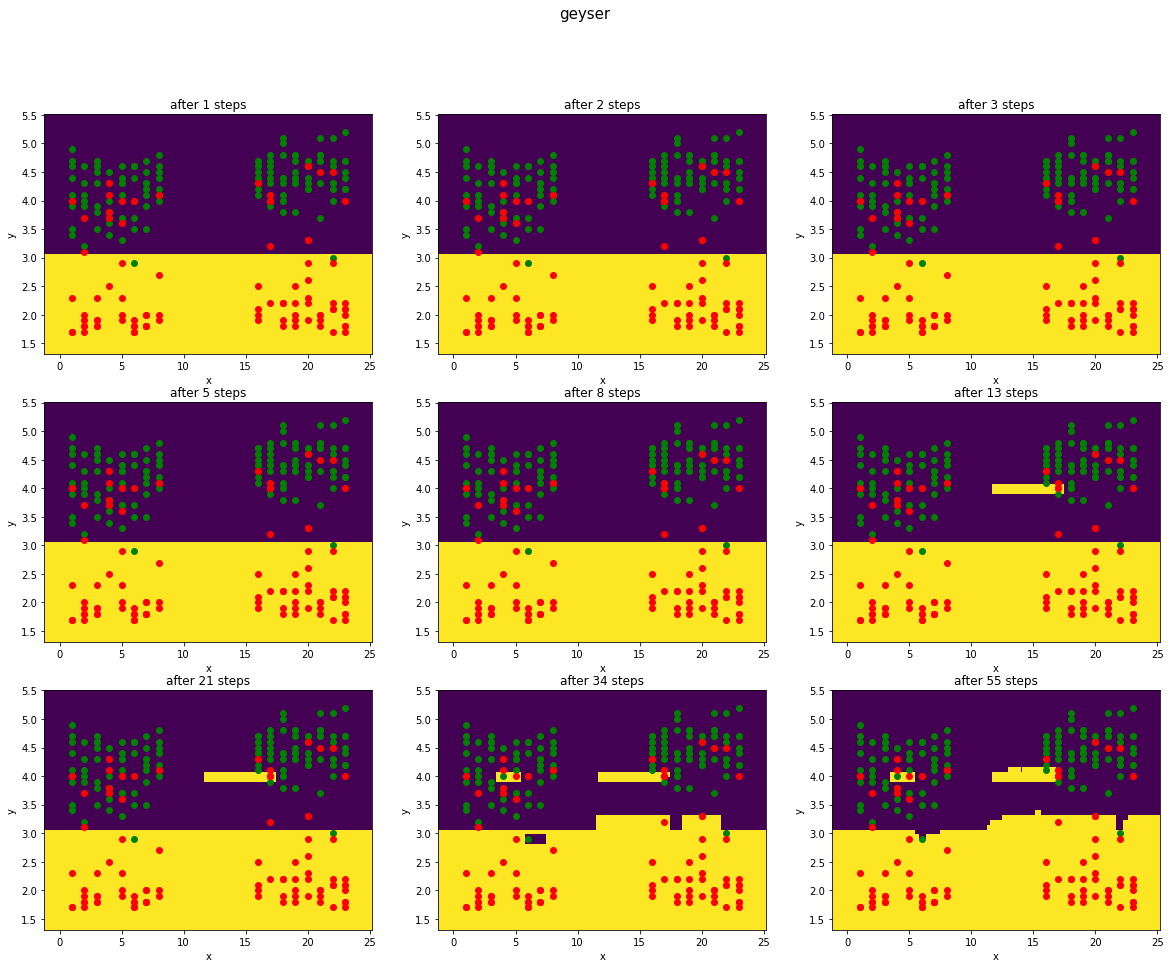

In [37]:
def coord_limits(data):
    xlim = data['x'].min(), data['x'].max()
    ylim = data['y'].min(), data['y'].max()
    dx = xlim[1] - xlim[0]
    dy = ylim[1] - ylim[0]
    return (xlim[0] - dx / 10, xlim[1] + dx / 10), (ylim[0] - dy / 10, ylim[1] + dy / 10)

for name, data_set in data_sets.items():
    classifier = AdaBoostClassifier(56, params)
    x, y = split_data(data_set)
    classifier.fit(x, y)
    
    xlim, ylim = coord_limits(data_set)
    fig, ax = plt.subplots(3, (len(steps) + 2) // 3, figsize=(20, 15))
    fig.suptitle(name, fontsize=15)
    for i in range(len(steps)):
        subplot = ax[i // 3][i % 3]
        meshgrid(
            classifier, 
            xlim, ylim, min(xlim[1] - xlim[0], ylim[1] - ylim[0]) / 50, steps[i],
            subplot
        )
        subplot.scatter(x[y == 0, 0], x[y == 0, 1], color='green')
        subplot.scatter(x[y == 1, 0], x[y == 1, 1], color='red')